# Load image

In [1]:
! pip install tensorflow==2.16.2

In [2]:
! pip uninstall numpy -y
! pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp310-cp310-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_10_9_x86_64.whl (20.6 MB)


In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

2025-03-18 15:52:01.306400: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
! pwd

/Users/luckas/code/mahshid90/waste_classification/notebooks


In [5]:
img = load_img("../raw_data/test_data/plastic.jpg")

# Preprocess image

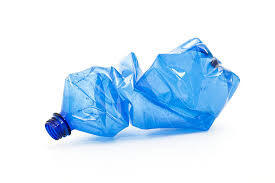

In [6]:
img

In [7]:
from PIL import Image

In [8]:
# Resize to 384x384
img = img.resize((384, 384))

img = img_to_array(img)/255
x = img.reshape((-1, 384, 384, 3))


In [9]:
x

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [10]:
x.shape

(1, 384, 384, 3)

# Load model


In [11]:
import tensorflow as tf

In [16]:
model = tf.keras.models.load_model("../models/transfer_resnet50_model_baseline.h5")

# Predict

In [13]:
classes = ["paper", "glass", "plastic", "metal", "cardboard", "trash"]

In [17]:
prediction = model.predict(x)
predicted_class = classes[(np.argmax(prediction[0]))]
print(predicted_class)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
trash
[[0.19480735 0.13129383 0.2599472  0.02756828 0.02765932 0.35872403]]
